## Parameter estimation in the glyoxalase system of _Leishmania infantum_.

### Part of the publication

Sousa Silva, M. , Ferreira, A.E.N., Tomás, A.M., Cordeiro, C., Ponces Freire, A. (2005)  Quantitative assessment of the glyoxalase pathway in Leishmania infantum as a therapeutic target by modelling and computer simulation. *FEBS Journal* **272(10)**: 2388-2398.

[doi:10.1111/j.1742-4658.2005.04632.x](https://febs.onlinelibrary.wiley.com/doi/abs/10.1111/j.1742-4658.2005.04632.x)

The main objective of this module is to study the **estimation of parameters** of kinetic models of biochemical systems from experimental **time-course data**.

We will see in a moment what exactly a time course is.

This module uses the python library *S-timator*.

In [2]:
%matplotlib inline

In [3]:
import stimator as st

### Glyoxalase pathway in *L. infantum*

This example uses **real data for a real biochemical pathway**.

The main difference here is that we can actually use **two** time courses of experimental measures

In [4]:
glos = """
# Example file for S-timator
title Glyoxalase system in L. Infantum
variables SDLTSH HTA  # variables (the order matches the timecourse files)

#reactions (with stoichiometry and rate)
glx1 : HTA -> SDLTSH, rate = V1*HTA/(Km1 + HTA)
glx2 : SDLTSH ->, V2*SDLTSH/(Km2 + SDLTSH)

find V1  in [0.00001, 0.0001]
find Km1 in [0.01, 1]
find V2  in [0.00001, 0.0001]
find Km2 in [0.01, 1]

init : (SDLTSH = 7.69231E-05, HTA = 0.1357)

timecourse TSH2a.txt
timecourse TSH2b.txt

generations = 200   # maximum generations for GA
popsize = 80     # population size in GA"""

mglos = st.read_model(glos)

### Data

The data are two time courses with spectrophotometric measurements of SDL-TSH.


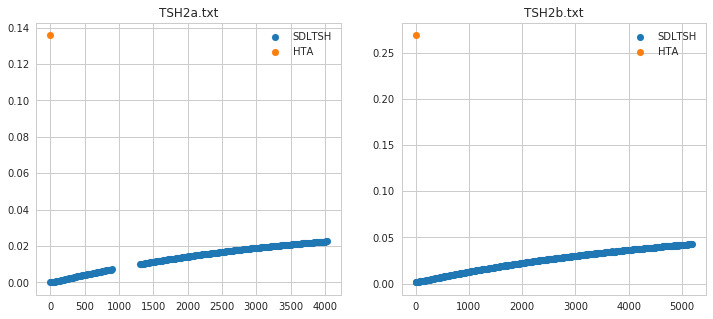

In [7]:
st.readTCs(['TSH2a.txt', 'TSH2b.txt']).plot(fig_size=(12,5))

### Parameter estimation


-- reading time courses -------------------------------
file C:\Users\tonho\Desktop\other_github_repos\papers_repr_glyoxalases\silva_et_al_2005_FEBS_J\TSH2a.txt:
244 time points, 2 variables
file C:\Users\tonho\Desktop\other_github_repos\papers_repr_glyoxalases\silva_et_al_2005_FEBS_J\TSH2b.txt:
347 time points, 2 variables

Solving Glyoxalase system in L. Infantum...
0   : 0.000558
1   : 0.000558
2   : 0.000558
3   : 0.000361
4   : 0.000361
5   : 0.000361
6   : 0.000361
7   : 0.000361
8   : 0.000361
9   : 0.000361
10  : 0.000361
11  : 0.000361
12  : 0.000361
13  : 0.000361
14  : 0.000361
15  : 0.000361
16  : 0.000361
17  : 0.000361
18  : 0.000361
19  : 0.000361
20  : 0.000361
21  : 0.000361
22  : 0.000361
23  : 0.000361
refining last solution ...

Done!
Too many generations with no improvement in 24 generations.
best score = 0.000011
best solution: [2.57590880e-05 2.52521085e-01 2.23384396e-05 9.80748343e-02]
Optimization took 3.140 s (00m 03.140s)

--- PARAMETERS           ----------

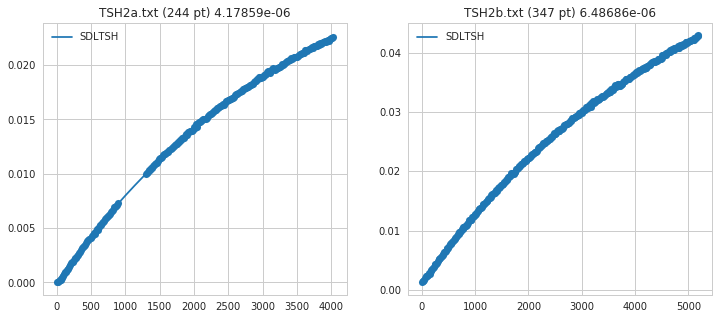

In [9]:
best = mglos.estimate()
print (best)
best.plot(fig_size=(12,5))